In [1]:
from beamz9000.model import Node

In [2]:
nodes = [
    Node(3, "A"),
    Node(0, "B"),
    Node(2, "C"),
]
print(list(sorted(nodes)))

[Node(x=0, label='B'), Node(x=2, label='C'), Node(x=3, label='A')]


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from typing import NamedTuple

In [137]:
class BeamPlot(NamedTuple):
    x: list[float]
    y: list[float]
    scale: float = 1

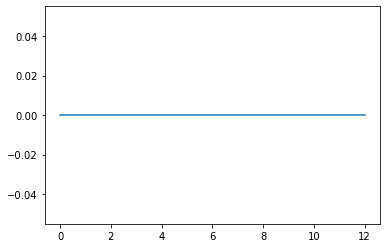

In [138]:
fig, ax = plt.subplots()
beam_line = ([0, 12], [0, 0])
ax.plot(*beam_line)

200


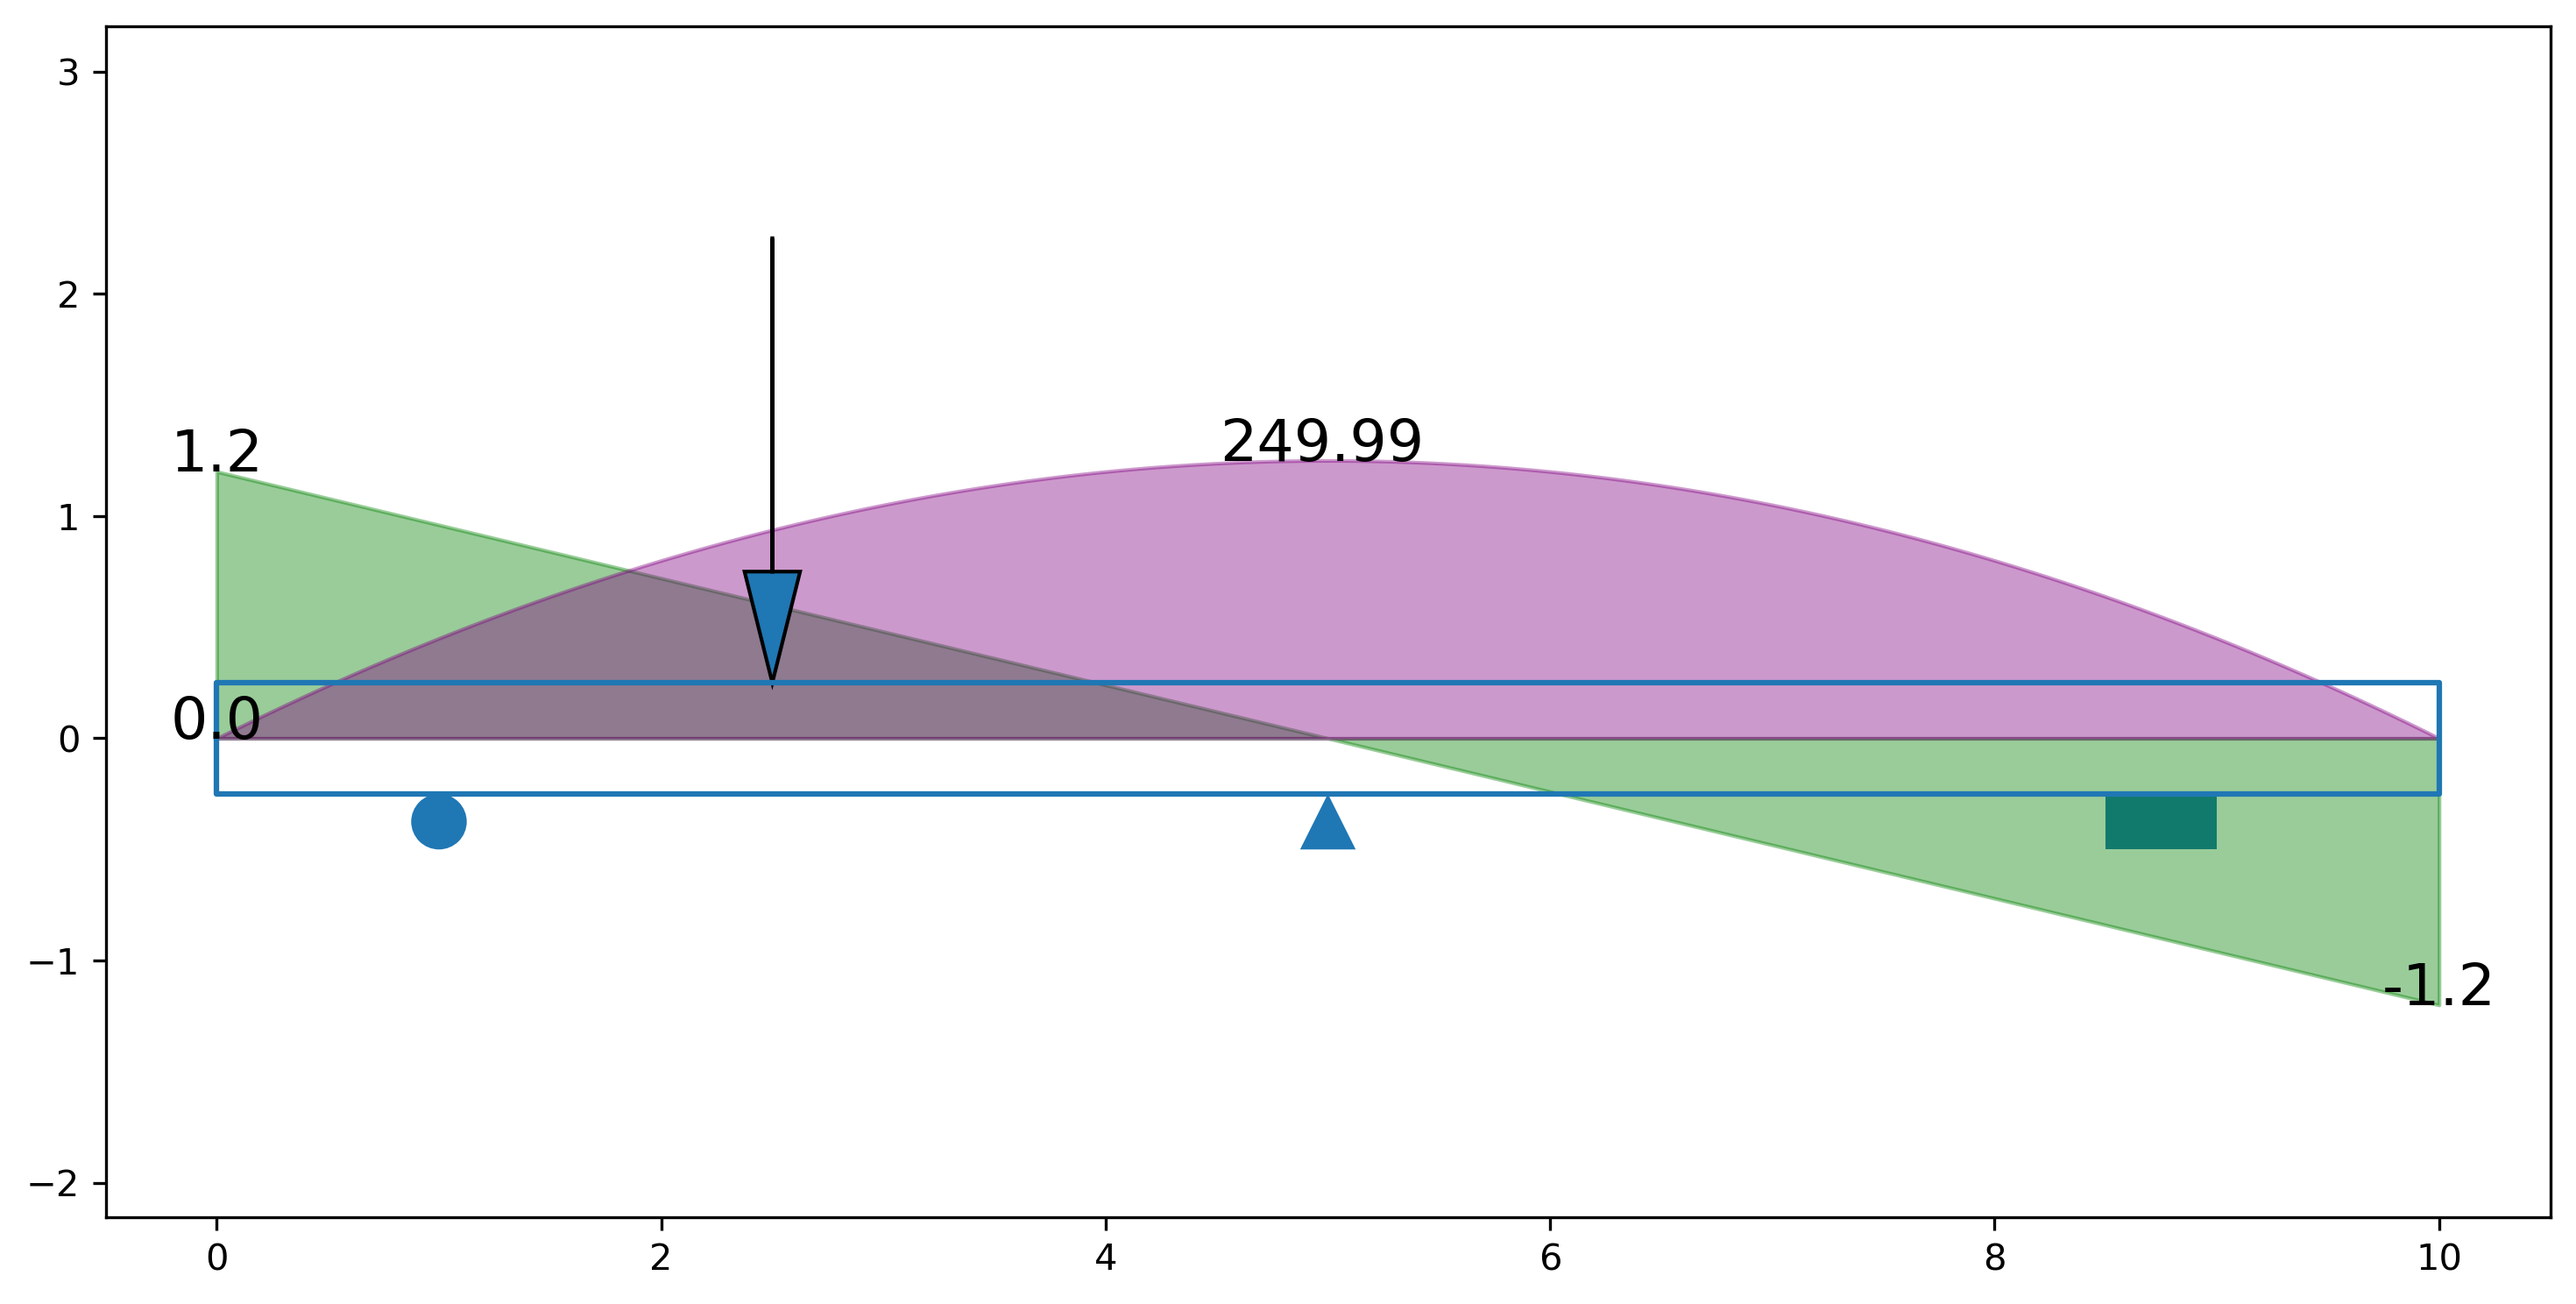

In [157]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax.axis('equal')
d = 0.5
l = 10
w = 20


# Beam
beam_obj = BeamPlot([0, 0, l, l, l, 0, 0], [0, d/2, d/2, 0, -d/2, -d/2, 0])
ax = support_at_coordinate(ax, (1, -d/2), d, "roller")
ax = support_at_coordinate(ax, (5, -d/2), d, "pin")
ax = support_at_coordinate(ax, (9, -d/2), d, "fix")

# Shear
shear_dia = BeamPlot([0, 0, l, l], [0, 1.2, -1.2, 0])
ax = label_max_min(ax, shear_dia.x, shear_dia.y)

# Moment
x = np.linspace(0, l, 200)
mo = (w*x / 2 * (l - x))
moment_dia = BeamPlot(x=x, y=mo, scale=w*l)
print(moment_dia.scale)
ax = label_max_min(ax, moment_dia.x, moment_dia.y, moment_dia.scale)

ax.plot(beam_obj.x, beam_obj.y)
ax.fill_between(shear_dia.x, shear_dia.y, alpha=0.4, color="green")
ax.fill_between(moment_dia.x, moment_dia.y / moment_dia.scale, alpha=0.4, color="purple")
ax = arrow_at_coordinate(ax, (l/4, d/2), 2, 90, dict(head_width=d/2, head_length=d))

In [150]:
import math

def label_max_min(ax, x: np.ndarray, y: np.ndarray, scale: float=1):
    """
    Returns 'ax' with a text label with the value of max and min
    centered at their locations
    """
    if 0 < scale < 1:
        scale = 1/scale
    font = {'size': 16}
    min_y_idx, max_y_idx = np.argmin(y), np.argmax(y)
    min_label, max_label = str(round(y[min_y_idx], 2)), str(round(y[max_y_idx], 2))
    min_x, max_x = x[min_y_idx], x[max_y_idx]
    ax.text(min_x, y[min_y_idx] / scale, min_label, horizontalalignment="center", fontdict=font)
    ax.text(max_x, y[max_y_idx] / scale, max_label, horizontalalignment="center", fontdict=font)
    return ax


def arrow_at_coordinate(ax, point: tuple, magnitude: float, angle: float, arrow_params: dict):
    """
    Returns ax with an arrow added to it that *points to* the coordinate ('x', 'y') with
    an arrow containing arrow_params.
    """
    pt_x, pt_y = point
    v_x, v_y = math.cos(math.radians(angle)), math.sin(math.radians(angle))
    dx = -v_x * magnitude
    dy = -v_y * magnitude
    x = pt_x - dx
    y = pt_y - dy
    ax.arrow(x=x, y=y, dx=dx, dy=dy, length_includes_head=True, **arrow_params)
    return ax
    
    
def support_at_coordinate(ax, xy: tuple, beam_depth: float, support_type: str, angle: float=90):
    """
    Returns ax with a support of 'support_type' at 'angle' added to the coordinate,
    'xy'.
    """
    if support_type == "roller":
        x_0, y_0 = xy
        x_1, y_1 = x_0, y_0 - beam_depth/4
        patch = mpl.patches.Circle((x_1, y_1), radius=beam_depth/4)
    elif support_type == "pin":
        x_0, y_0 = xy
        x_1, y_1 = x_0 - beam_depth/2*math.sin(math.radians(30)), y_0 - beam_depth/2
        x_2, y_2 = x_0 - x_1 + x_0, y_1
        xy_array = np.array([[x_0, x_1, x_2], [y_0, y_1, y_2]]).T
        patch = mpl.patches.Polygon(xy_array)
    elif support_type == "fixed" or support_type == "fix":
        x_0, y_0 = xy
        height = beam_depth/2
        width = beam_depth
        x_1, y_1 = x_0 - width, y_0 - height
        patch = mpl.patches.Rectangle((x_1, y_1), width, height)
    ax.add_patch(patch)
    return ax
    
    
def roller_classic_patch(xy: tuple, beam_depth: Optional[float]=None, angle_deg: float=90):
    """
    Returns a matplotlib patch representing a 'roller' support in the "classic" 
    style.
    If 'beam_depth' is provided, then the roller will be drawn "under" the beam
    at its depth. Otherwise, it is drawn "under" the coordinate 'xy'.
    """
    x_0, y_0 = xy
    radius = 4
    if beam_depth is not None:
        x_1, y_1 = x_0, y_0 - beam_depth/4
    else:
        x_1, y_1 = x_0, y_0 - radius/2
    patch = mpl.patches.Circle((x_1, y_1), radius=beam_depth/4)
    
    
    